<a href="https://colab.research.google.com/github/jaicdev/Notebooks/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Exploratory Data Analysis and Linear Regression Model for Diabetes Dataset

1. Importing Necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import seaborn as sns

2. Loading and Understanding the Dataset

In [ ]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Concatenate data and target arrays along columns
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns=['target'])
df = pd.concat([data, target], axis=1)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

3. Exploratory Data Analysis (EDA)

In [ ]:
# Display the DataFrame
print(df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [ ]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [ ]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
# Correlation analysis
correlation = df.corr()
print(correlation)


             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

<Axes: >

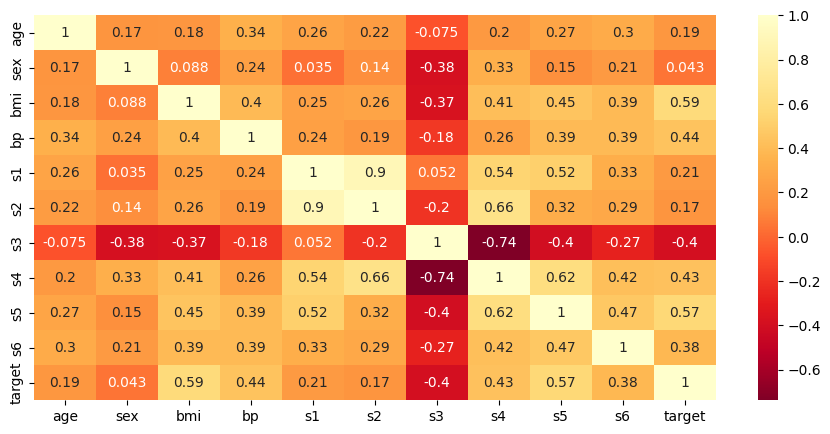

In [ ]:
corr = df.corr(method='pearson').round(3)
plt.figure(figsize=(11,5))
sns.heatmap(corr, annot=True, cmap="YlOrRd_r")

4. Data Preprocessing and Feature Scaling

In [ ]:
# Split the DataFrame into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


5. Building and Evaluating the Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
print("Score:", model.score(X_test, y_test))


Score: 0.3322332173106183


In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ -1.721465   -11.5856942   27.51069174  14.3712086  -31.22139382
  15.26518393   1.16794747   8.18446857  35.83753415   2.12323129]
Intercept: 151.60623229461757


In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[238.46949509 248.92812015 164.05732579 120.30774826 187.42483427
 259.04746969 113.55788482 188.07762807 149.49521726 236.00758247
 172.24561893 178.87936198 109.16034679  92.13333574 243.32766187
  87.35445583 155.72165684  66.98992013 100.42233598 218.0957236
 196.6646301  161.2972646  161.70870434 156.52404017 197.88770177
 167.58280539 120.7427979   84.84033238 192.03438449 160.60496231
 175.17348034  84.22759674 145.80002729 145.97264454 140.96436257
 197.00423168 165.94319214 190.6597389  128.22361933 206.41497077
  84.3575017  164.02262498 144.10639773 184.68996616 177.80076449
  74.33261184 143.36644877 138.68063137 120.80857573 234.34288711
 161.94132344  74.54325994 154.71683591 156.78815442 237.41798756
 174.23210042 190.87871793 118.98140389 132.20521501 168.52914416
 214.73950634 171.42284128 157.37648738 108.86915142 257.06294458
 152.17962851  82.43753531 231.56764949 202.9088885   47.18175623
  78.46774353 129.30214156 104.60094227 144.65245785 132.27795739
 190.036687

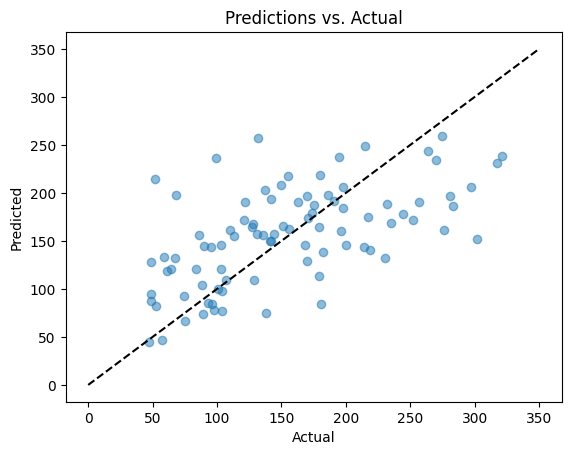

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([0, 350], [0, 350], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predictions vs. Actual')
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.3322332173106183
